In [5]:
!pip install pandas openpyxl matplotlib seaborn scikit-learn






In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make plots prettier
sns.set(style="whitegrid")


In [45]:
import pandas as pd

df = pd.read_excel(r"C:\Users\84T g4\Desktop\GHG_Project\greenhouse_gas.xlsx")


In [47]:
print(df.columns.tolist())



['Name', 'Supply Chain GHG Emission Factors for US Commodities and Industries']


In [49]:
print("✅ After cleaning:")
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print(df.head())


✅ After cleaning:
Rows: 0
Columns: 2
Empty DataFrame
Columns: [Industry_Name, Emission_Factor]
Index: []


In [52]:
import pandas as pd

file_path = r"C:\Users\84T g4\Desktop\GHG_Project\greenhouse_gas.xlsx"
df = pd.read_excel(file_path)

# Clean column names
df.columns = [col.strip() for col in df.columns]
df.head()


,Name,Supply Chain GHG Emission Factors for US Commodities and Industries
0,Authors,"Wesley Ingwersen, Mo Li"
1,Description,Tables presenting supply chain and margin emis...
2,DOI,http://doi.org/10.23719/1517769


In [53]:
excel_file = pd.ExcelFile(file_path)
print(excel_file.sheet_names)


['Cover', 'Contents', 'Data Dictionary', 'Sources', 'LCIA Factors of Other GHGs', '2016_Summary_Commodity', '2015_Summary_Commodity', '2014_Summary_Commodity', '2013_Summary_Commodity', '2012_Summary_Commodity', '2011_Summary_Commodity', '2010_Summary_Commodity', '2016_Summary_Industry', '2015_Summary_Industry', '2014_Summary_Industry', '2013_Summary_Industry', '2012_Summary_Industry', '2011_Summary_Industry', '2010_Summary_Industry', '2016_Detail_Commodity', '2015_Detail_Commodity', '2014_Detail_Commodity', '2013_Detail_Commodity', '2012_Detail_Commodity', '2011_Detail_Commodity', '2010_Detail_Commodity', '2016_Detail_Industry', '2015_Detail_Industry', '2014_Detail_Industry', '2013_Detail_Industry', '2012_Detail_Industry', '2011_Detail_Industry', '2010_Detail_Industry', 'Sheet1']


In [54]:
df = pd.read_excel(file_path, sheet_name="2016_Detail_Industry")
df.columns = [col.strip() for col in df.columns]
df.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.332,0.066,0.398,NaN,3,2,1,3,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,2,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.003,0.000,0.003,NaN,4,2,1,4,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.671,0.073,0.744,NaN,4,2,1,4,1


In [55]:
# Keep only relevant columns
df = df[[
    "Industry Code",
    "Industry Name",
    "Substance",
    "Supply Chain Emission Factors without Margins",
    "Margins of Supply Chain Emission Factors"
]].copy()

# Clean column names
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]
df.head()


,industry_code,industry_name,substance,supply_chain_emission_factors_without_margins,margins_of_supply_chain_emission_factors
0,1111A0,Oilseed farming,carbon dioxide,0.332,0.066
1,1111A0,Oilseed farming,methane,0.001,0.001
2,1111A0,Oilseed farming,nitrous oxide,0.002,0.000
3,1111A0,Oilseed farming,other GHGs,0.003,0.000
4,1111B0,Grain farming,carbon dioxide,0.671,0.073


In [58]:
from sklearn.preprocessing import OneHotEncoder

# Use the correct parameter for older versions
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[["industry_name", "substance"]])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["industry_name", "substance"]))


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Combine encoded features with target values
X = encoded_df  # Encoded industry_name + substance
y = df["supply_chain_emission_factors_without_margins"]
  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("✅ Model trained and evaluated:")
print(f"R² Score: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")


✅ Model trained and evaluated:
R² Score: 0.3100574305326512
MAE: 0.05455316455696202
MSE: 0.02490676780759493


In [62]:

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assume df is your original DataFrame

# Features and target
X = df[['industry_name', 'substance']]
y = df['supply_chain_emission_factors_without_margins']

# One-hot encode categorical columns
categorical_features = ['industry_name', 'substance']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# This step creates the encoded features
X_encoded = preprocessor.fit_transform(X)


In [63]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# XGBoost
xgb_model = xgb.XGBRegressor(random_state=42, eval_metric='rmse')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Evaluation function
def evaluate(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}\n")

# Evaluate both
evaluate(y_test, rf_preds, "Random Forest")
evaluate(y_test, xgb_preds, "XGBoost")


--- Random Forest ---
R² Score: 0.3103
MAE: 0.0545
MSE: 0.0249

--- XGBoost ---
R² Score: 0.4644
MAE: 0.0513
MSE: 0.0193



In [64]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10,
    scoring='r2', cv=3, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best params:", random_search.best_params_)

# Use best estimator to predict
best_rf = random_search.best_estimator_
best_rf_preds = best_rf.predict(X_test)
evaluate(y_test, best_rf_preds, "Tuned Random Forest")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}
--- Tuned Random Forest ---
R² Score: 0.5333
MAE: 0.0487
MSE: 0.0168



In [65]:
from sklearn.model_selection import cross_val_score

# Use tuned best_rf or default rf
model_for_cv = best_rf

scores = cross_val_score(model_for_cv, X_encoded, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {scores}")
print(f"Mean R² score: {np.mean(scores):.4f}")


Cross-validated R² scores: [ 0.32433939  0.17149575  0.23649228  0.35167549 -3.62505587]
Mean R² score: -0.5082


In [66]:
import joblib

# Save both the preprocessor and model
joblib.dump(preprocessor, 'preprocessor.joblib')
joblib.dump(best_rf, 'best_rf_model.joblib')


['best_rf_model.joblib']

In [67]:
# Load saved objects
loaded_preprocessor = joblib.load('preprocessor.joblib')
loaded_model = joblib.load('best_rf_model.joblib')

# Example new data
new_data = pd.DataFrame({
    'industry_name': ['Industry A'],
    'substance': ['Substance X']
})

# Preprocess and predict
new_data_encoded = loaded_preprocessor.transform(new_data)
prediction = loaded_model.predict(new_data_encoded)
print("Predicted emission factor:", prediction[0])


Predicted emission factor: 0.0014215893265651358


In [68]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

X = df[['industry_name', 'substance']]
y = df['supply_chain_emission_factors_without_margins']

# Preprocessing pipeline for categorical features
categorical_features = ['industry_name', 'substance']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])


In [69]:
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(random_state=42, objective='reg:squarederror'))
])

# Hyperparameter grid for RandomizedSearch
param_distributions = {
    'regressor__n_estimators': [100, 200, 300, 400],
    'regressor__max_depth': [3, 5, 7, 10],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'regressor__subsample': [0.6, 0.8, 1.0],
    'regressor__colsample_bytree': [0.6, 0.8, 1.0],
    'regressor__gamma': [0, 0.1, 0.3],
    'regressor__reg_alpha': [0, 0.1, 1],
    'regressor__reg_lambda': [1, 1.5, 2],
}

random_search = RandomizedSearchCV(
    model, param_distributions, n_iter=30, scoring='r2', cv=5, verbose=2, random_state=42, n_jobs=-1
)

# Fit and search for best hyperparameters
random_search.fit(X_train, y_train)

print("Best params:", random_search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params: {'regressor__subsample': 1.0, 'regressor__reg_lambda': 2, 'regressor__reg_alpha': 1, 'regressor__n_estimators': 400, 'regressor__max_depth': 5, 'regressor__learning_rate': 0.01, 'regressor__gamma': 0, 'regressor__colsample_bytree': 1.0}


In [70]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")


R² Score: 0.5170
MAE: 0.0495
MSE: 0.0174


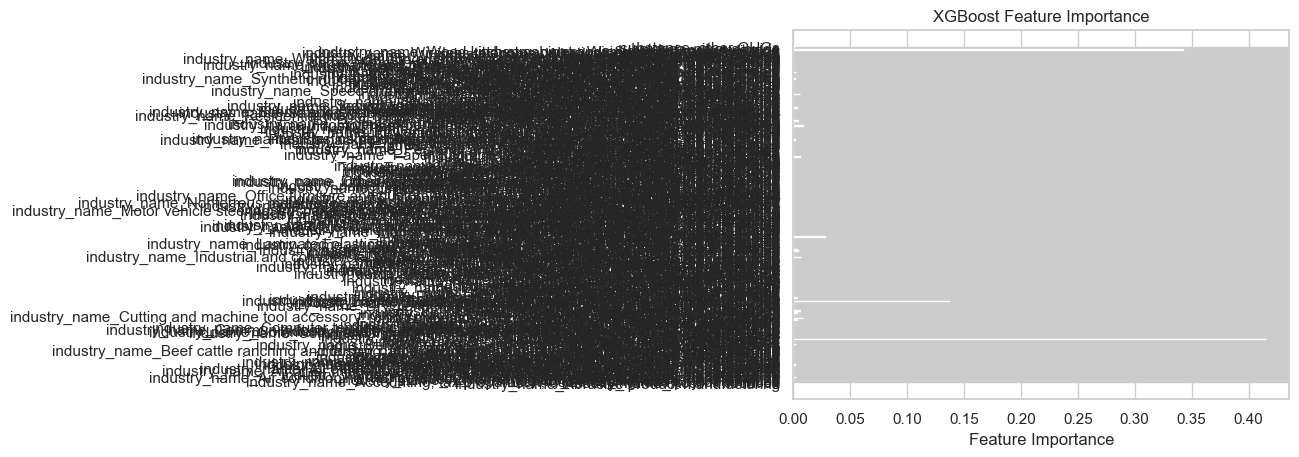

In [71]:
import matplotlib.pyplot as plt

xgb_model = best_model.named_steps['regressor']
feature_names = best_model.named_steps['preprocessor'].transformers_[0][1].named_steps['onehot'].get_feature_names_out(categorical_features)

importance = xgb_model.feature_importances_
plt.barh(feature_names, importance)
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()
